# **Impoting all the basic required dependencies**

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# Its time to import the dataset itself.

In [2]:
data = pd.read_csv("etherpricehistory.csv")

In [3]:
#Lets get a glimpse of the Dataset right here.
data.head(8)

,Date(UTC),UnixTimeStamp,Value
0,7/12/2016,1468281600,10.54
1,7/13/2016,1468368000,10.44
2,7/14/2016,1468454400,11.55
3,7/15/2016,1468540800,11.88
4,7/16/2016,1468627200,11.59
5,7/17/2016,1468713600,11.19
6,7/18/2016,1468800000,11.03
7,7/19/2016,1468886400,11.63


**You can observe it has 3 columns namely Date, TimeStamp and The actual Value of Ether. We wont be needing Date for our Neural network so lets drop it right here.**

In [4]:
data.drop(data.columns[[0]], axis=1, inplace=True)

In [5]:
data.head(8)

,UnixTimeStamp,Value
0,1468281600,10.54
1,1468368000,10.44
2,1468454400,11.55
3,1468540800,11.88
4,1468627200,11.59
5,1468713600,11.19
6,1468800000,11.03
7,1468886400,11.63


**Lets plot the entire dataset as observe the Volatality**

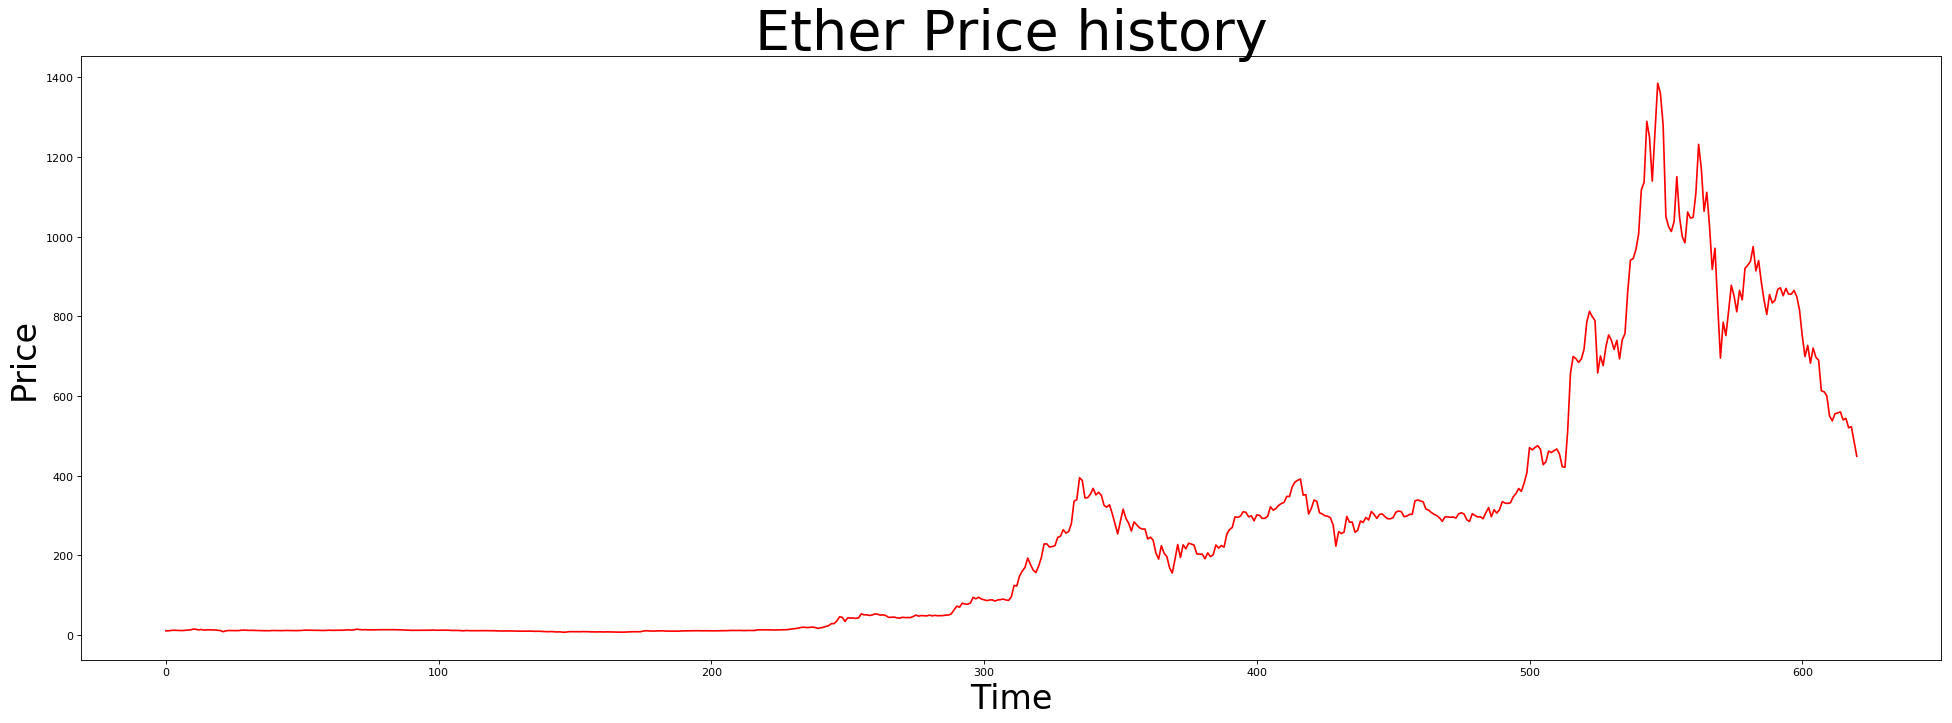

In [6]:
plt.figure(figsize=(30,10), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(data.values[:, 1], color = 'red', label= 'Actual Ether Price')

plt.title('Ether Price history', fontsize = 50)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.show()

**No wonder Ether is so Volatile when it comes to its price. But to make the Neural Net recognize the corelations, The data needs to be Normalized.**

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #Creating a scaler object that can be used to normalize the data.
data_norm = scaler.fit_transform(data) #Normalization Part.

**Data_norm needs to be brought into a shape that can be recognized by the Neural Net.**

In [13]:
np.reshape(data_norm, (621,2))
pd.DataFrame(data_norm)

,0,1
0,0.000000,0.002793
1,0.001605,0.002721
2,0.003210,0.003526
3,0.004815,0.003765
4,0.006421,0.003555
5,0.008026,0.003265
6,0.009631,0.003149
7,0.011236,0.003584
8,0.012841,0.004244
9,0.014446,0.004331


**Spliting the Data into Training and Testing sets seperately will be helpful. Normally i'd go for 20% Test size and the rest to be Training but because i've got a really small Dataset here i'd like to put in as much data into Training as possible. So i'd make it 10% testing.**

In [92]:
train_set = data_norm[:len(data_norm) - 65 ,:]
test_set = data_norm[len(data_norm) - 65:,:]

train_x = train_set[0:len(train_set)-1, 0] ##Matrix of features from the Training set
train_y = train_set[1:len(train_set), 1] ##The Dependent Variable
train_x = np.reshape(train_x, (555, 1, 1)) ##Converts into a 555x1 matrix


**Lets get started with our LSTM Neural Net by importing some dependencies.**

In [93]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

neuralnet = Sequential() ##Initializing the NN

neuralnet.add(LSTM(units = 5, activation = 'sigmoid', input_shape=(None, 1))) ##The intermediate Layer that also creates the initial layer.

neuralnet.add(Dense(units = 1)) ##Only one Output neuron would do.

neuralnet.compile(optimizer = 'adam', loss = 'mean_squared_error')



In [94]:
neuralnet.fit(train_x, train_y, batch_size= 5, epochs = 50)

Epoch 1/50
555/555 [==============================] - 28s 50ms/step - loss: 0.3414
Epoch 2/50
555/555 [==============================] - 1s 2ms/step - loss: 0.1236
Epoch 3/50
555/555 [==============================] - 1s 2ms/step - loss: 0.0544
Epoch 4/50
555/555 [==============================] - 1s 2ms/step - loss: 0.0370
Epoch 5/50
555/555 [==============================] - 1s 2ms/step - loss: 0.0336
Epoch 6/50
555/555 [==============================] - 1s 2ms/step - loss: 0.0326
Epoch 7/50
555/555 [==============================] - 1s 2ms/step - loss: 0.0317
Epoch 8/50
555/555 [==============================] - 1s 2ms/step - loss: 0.0310
Epoch 9/50
555/555 [==============================] - 1s 2ms/step - loss: 0.0301
Epoch 10/50
555/555 [==============================] - 1s 2ms/step - loss: 0.0293
Epoch 11/50
555/555 [==============================] - 1s 2ms/step - loss: 0.0284
Epoch 12/50
555/555 [==============================] - 1s 2ms/step - loss: 0.0275
Epoch 13/50
555/555 [==

**Now comes the part when the neural net is put to test with our test set.**

In [111]:
inputs = test_set[:,0]
inputs = np.reshape(inputs, (len(test_set), 1, 1))

In [112]:
predictions = neuralnet.predict(inputs)
predictions = scaler.inverse_transform(predictions)

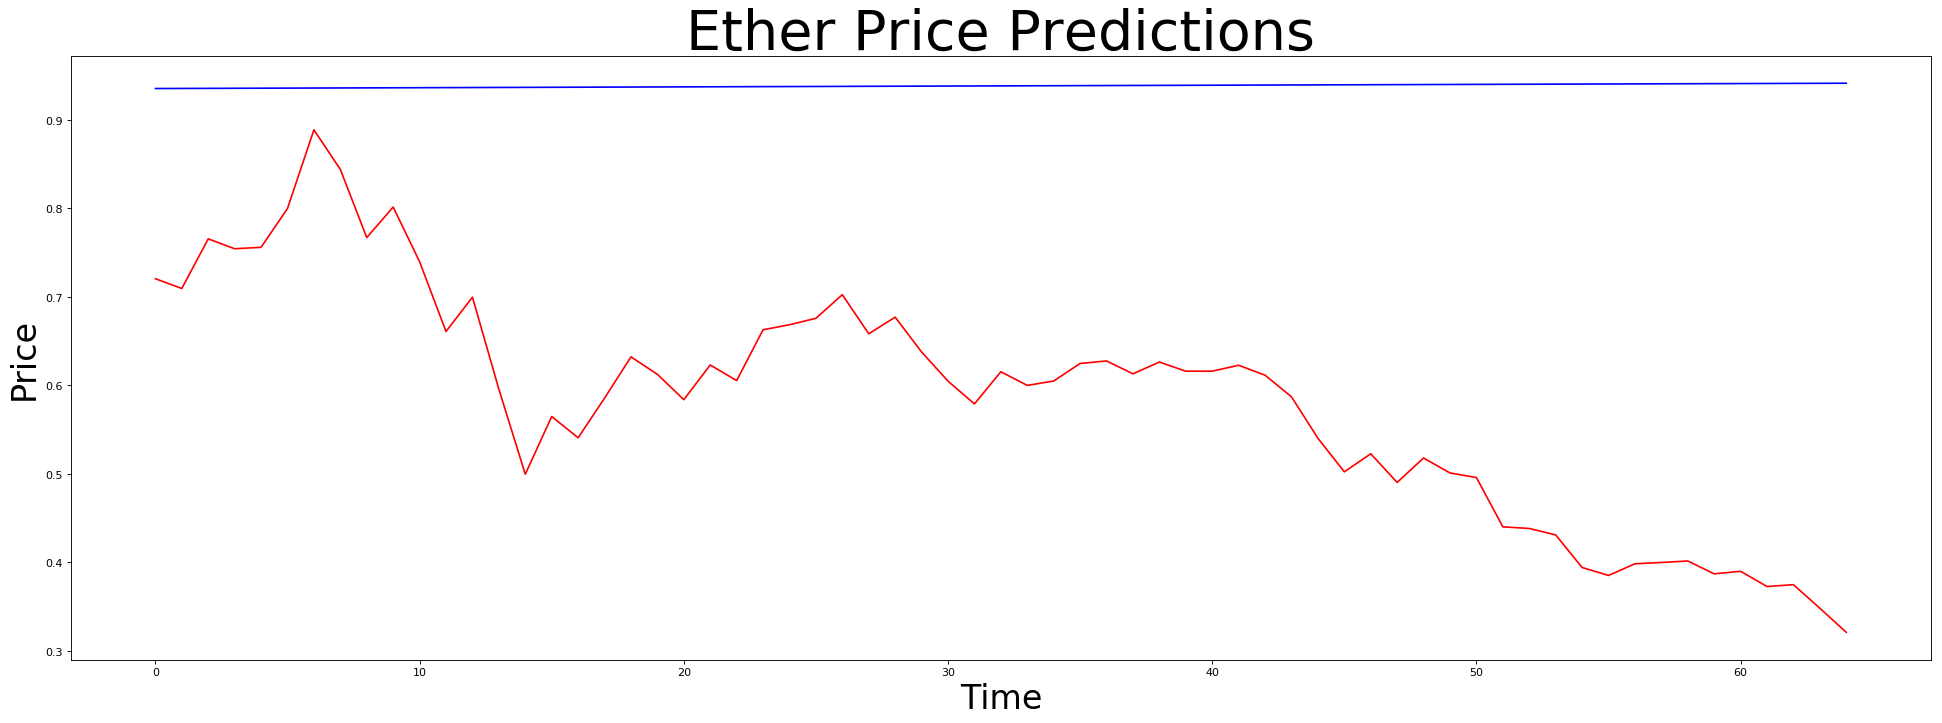

In [113]:
plt.figure(figsize=(30,10), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 1], color = 'red', label= 'Actual Ether Price')
plt.plot(predictions[:, 0], color = 'blue', label= 'The Predictied Ether Price')

plt.title('Ether Price Predictions', fontsize = 50)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.show()

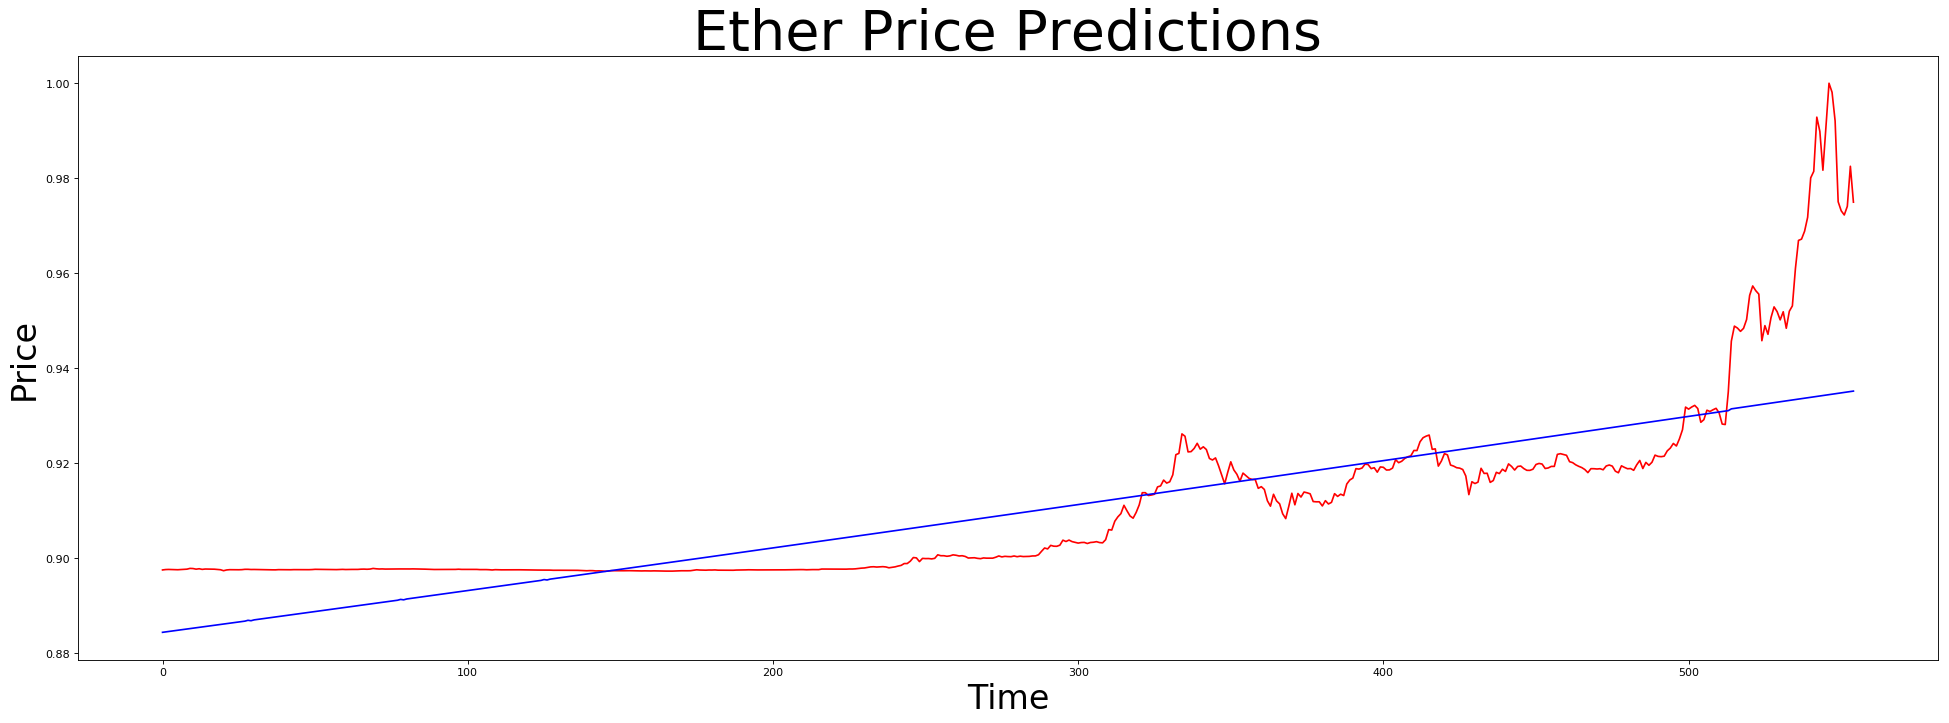

In [118]:

predictions1 = neuralnet.predict(train_x)
predictions1 = scaler.inverse_transform(predictions1)
train_y = np.reshape(train_y, (555, 1))
train_y = scaler.inverse_transform(train_y)

plt.figure(figsize=(30,10), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(train_y[:, 0], color = 'red', label= 'Actual Ether Price')
plt.plot(predictions1[:, 0], color = 'blue', label= 'The Predictied Ether Price')

plt.title('Ether Price Predictions', fontsize = 50)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.show()